In [1]:
import numpy as np
import pandas as pd
from itertools import product
from KC_methods import  methods
import seaborn as sns

In [9]:

# # Generate all binary strings of length 20 and calculate complexities
# allseq = ["".join(x) for x in product("01",repeat=20)]
# allseq

# df  = pd.DataFrame()
# df['x'] = allseq
# for method in methods:
#     df[method] = df["x"].apply(methods[method])
#     print(f"Done with {method}")
# df
# df.to_csv("KC_all_len_20_bins.csv")

# Get 50 random strings of length 250 for each number of 1s (50 with only 1 one, 50 with two ones, etc)
import random
res = []
n = 250
for i in range(251):
    s = "0" * (n-i) + "1" * i
    for i in range(50):
        res.append("".join(random.sample(s,len(s))))

res_final = list(set(res))
print(len(res_final))
df = pd.DataFrame()
df['x'] = res_final
for method in methods:
    df[method] = df["x"].apply(methods[method])
    print(f"Done with {method}")
df.to_csv("KC_sample_len_250.csv")

12446
Done with LZ76_adapted
Done with LZ78
Done with CTW
Done with PLT
Done with LZ76
Done with BDM
Done with ENTROPY


In [12]:
method_list = methods.keys()
method_list = ["LZ76_adapted","LZ76","LZ78","CTW","PLT","BDM","ENTROPY"]

In [18]:
df = pd.read_csv("KC_all_len_20_bins.csv")
# df = pd.read_csv("KC_sample_len_250.csv")

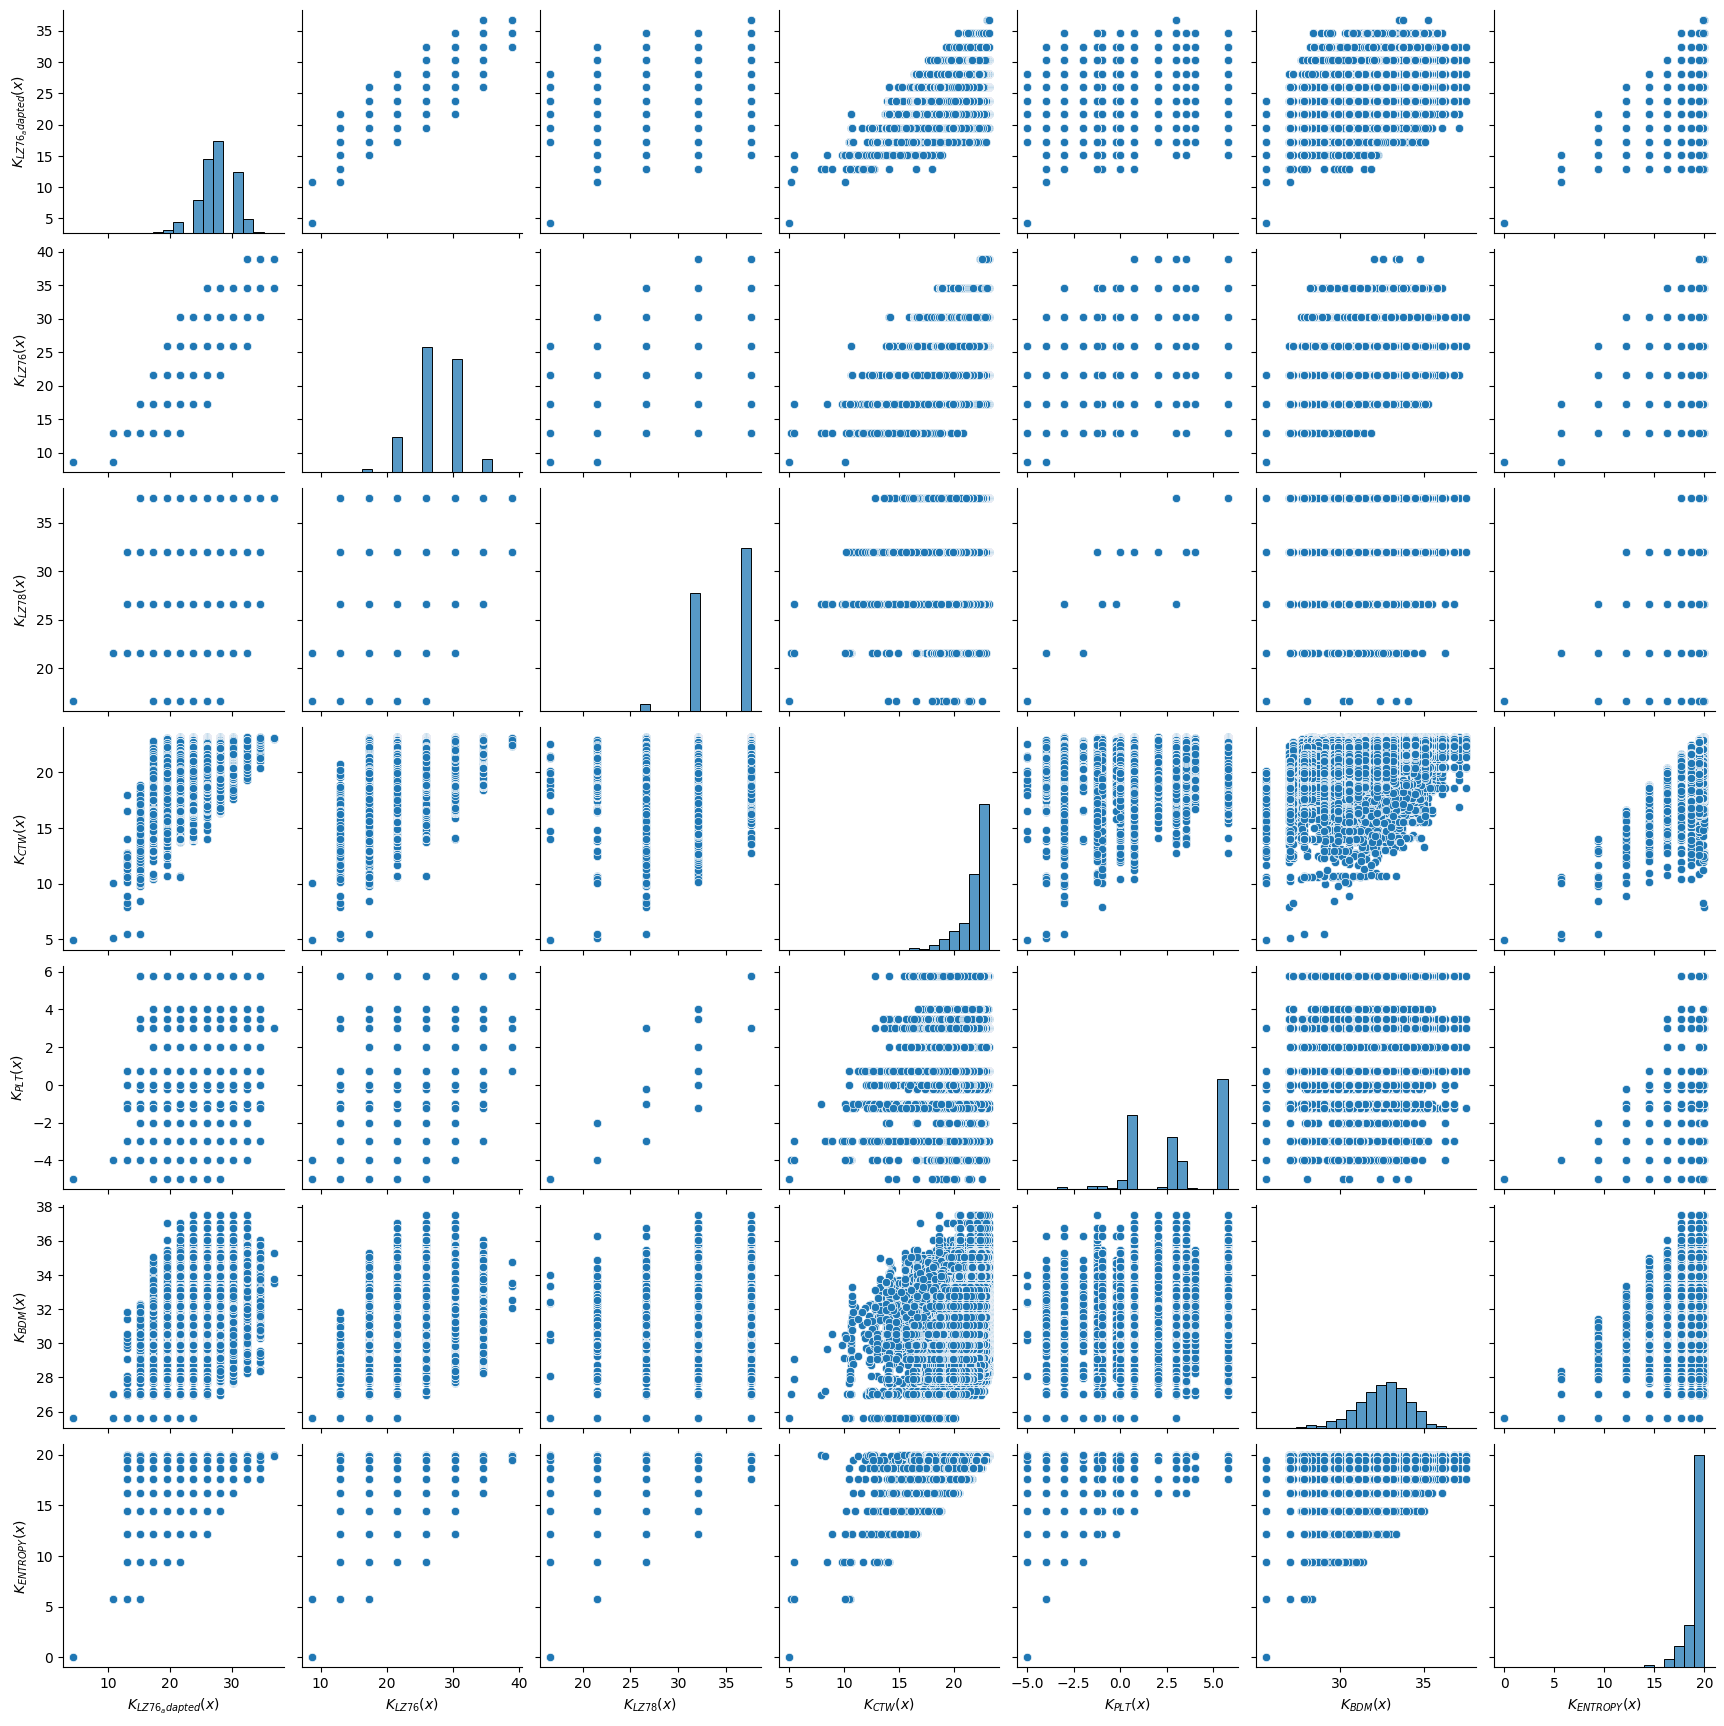

In [19]:
fig = sns.pairplot(df[method_list],diag_kws=dict(bins=20))
new_ones=[r"$K_{%s}(x)$" % x for x in methods.keys()]

for i in range(len(methods)):
    for j in range(len(methods)):
        old_y = fig.axes[i,j].get_ylabel()
        old_x = fig.axes[i,j].get_xlabel()
        fig.axes[i,j].set_ylabel(r"$K_{%s}(x)$" % old_y )
        fig.axes[i,j].set_xlabel(r"$K_{%s}(x)$" % old_x )
        # if i ==j:
        #     fig.axes[i,j].set_yscale('log')


# fig.savefig("results/complexity_correlations/corr_len_250.jpg")
fig.savefig("results/complexity_correlations/corr_len_20.jpg")

In [ ]:

fig = sns.pairplot(df[method_list],plot_kws=dict(bins=15),kind='hist',diag_kws=dict(bins=25))